# Lecture 29 - Numerical Solutions of Two-Point BVPs

## Overview, Objectives, and Key Terms
 
This lesson is all about the two-point boundary-value problems common to models in a variety of 

is a direct extension of [Lecture 27](ME400_Lecture_27.ipynb), in which the focus was the numerical solution of first-order IVPs.  Here, those techniques are extended to *systems* of first-order equations.

### Objectives

By the end of this lesson, you should be able to

- Solve two-point, heterogeneous BVPs.
- Solve two-point, homogeneous BVPs.
- Expain how the same approach could be extended to multiple dimensions.

### Prerequisites

You should already be able to

- Solve IVPs using Euler's method based on the material of [Lecture 27](ME400_Lecture_27.ipynb)
- Define one- and two-dimensional arrays using NumPy arrays based on the material of [Lecture 4](ME400_Lecture_4.ipynb).  
- Use `np.linalg.solve` to solve $\mathbf{Ax = b}$ based on the material of [Lecture 4](ME400_Lecture_4.ipynb).

Please review these topics (and resources) as needed.

### Key Terms



## Chopping Up the BVP

Our focus is again on the second-order BVP
\begin{equation}
    \frac{d^2 y}{dx^2} + p(x) \frac{dy}{dx} + q(x) y(x) = f(x), \qquad y(a) = y_a, \qquad y(b) = y_b \, .
\end{equation}
The goal is to apply [Numerical Differentiation](../../../courses/pythonic_apps_1/module_4/numerical_differentiation.rst) to this equation, leading to a linear system.  

Observe that there are two derivatives in the BVP, one second order, and one first order.  There are numerous ways to approximate these by finite differences, but we'll opt for a method with second-order errors.  For the first derivative, we already analyzed the central difference:
\begin{equation}
    \frac{dy}{dx} = \frac{y(x+\Delta)-y(x-\Delta)}{2\Delta} + \mathcal{O}(\Delta^2) \, .
\end{equation}
For the second derivative, we saw (but did not analyze) another central difference:
\begin{equation}
    \frac{d^2y}{dx^2} = \frac{y(x+\Delta)-2y(x)+y(x-h)}{\Delta^2} + \mathcal{O}(\Delta^2) \, .
\end{equation}

Given these differencing schemes, let us chop the domain $x\in [a, b]$ into discrete points $x_i = a + \Delta i,\, i = 0, 1, \ldots, n$, where $\Delta = (b-a)/n$.  For all but $i=0$ and $i=n$, we have 
\begin{equation}
    \frac{y_{i+1} - 2y_i + y_{i-1}}{\Delta^2}
      + p_i \frac{y_{i+1}-y_{i-1}}{2 \Delta}
        + q_i y_i 
          = f_i
\end{equation}
where, for example, $y_i = y(x_i)$.

At the boundaries, we need to be more careful.  For the given boundary conditions, our equations are as simple as 
\begin{equation}
    y_0 = y_a
\end{equation}
and
\begin{equation}
    y_n = y_b \, .
\end{equation}
However, different equations will be needed for different boundary conditions, e.g., how would you handle $y'(a) = 0$?  This (and other questions) are left as exercises. 

## A Simple Example

To illustrate the approach just described, let us consider our previous example for which $p(x)=0$, $q(x)=f(x)=-1$, and $y(0) = y(10) = 0$.  The analytic solution is $y(x) = 1 - e^{10-x}/(1+e^{10}) - e^{x}/(1+e^{10})$.
We'll keep it simple and let $n = 4$, which gives us five equations:
\begin{equation}
    \begin{aligned}
    y_0  &= 0 \\
    \frac{y_2 - 2y_1 - y_0}{\Delta^2} - y_1 &= -1 \\
    \frac{y_3 - 2y_2 - y_1}{\Delta^2} - y_1 &= -1 \\
    \frac{y_4 - 2y_3 - y_2}{\Delta^2} - y_1 &= -1 \\    
    y_4  &= 0
    \end{aligned} \, .
\end{equation}
In matrix form, these become
\begin{equation}
 \left [
   \begin{matrix}
      1          & 0           & 0           & 0           & 0 \\
      1/\Delta^2 & -2/\Delta^2 -1 & 1/\Delta^2  & 0           & 0 \\
      0          & 1/\Delta^2  & -2/\Delta^2 -1 & 1/\Delta^2  & 0 \\
      0          & 0           & 1/\Delta^2  & -2/\Delta^2 -1 & 1/\Delta^2  \\      
      0          & 0           & 0           & 0           & 1 \\      
   \end{matrix}
 \right ]
 \left [
   \begin{matrix}
      y_0 \\
      y_1 \\
      y_2 \\
      y_3 \\
      y_4 \\
   \end{matrix}
 \right ]
 =
 \left [
   \begin{matrix}
      0 \\
     -1 \\
     -1 \\
     -1 \\
      0 \\
   \end{matrix}
 \right ] \, .
\end{equation}
Let's solve this numerically:

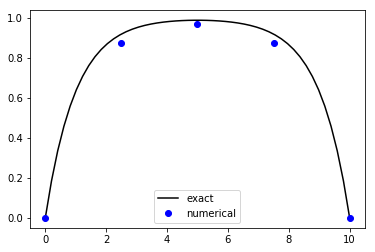

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
Delta = 2.5
A = np.array([[1, 0, 0, 0, 0], 
              [1/Delta**2, -2/Delta**2-1, 1/Delta**2, 0, 0],
              [0, 1/Delta**2, -2/Delta**2-1, 1/Delta**2, 0],
              [0, 0, 1/Delta**2, -2/Delta**2-1, 1/Delta**2],
              [0, 0, 0, 0, 1]])
b = np.array([0, -1, -1, -1, 0])
y_numerical = np.linalg.solve(A, b)
x = np.linspace(0, 10)
y_exact =  1.0 - np.exp(10-x)/(1+np.exp(10)) - np.exp(x)/(1+np.exp(10))
plt.plot(x, y_exact, 'k', [0, 2.5, 5.0, 7.5, 10], y_numerical, 'bo')
plt.legend(['exact', 'numerical'], loc=0, numpoints=1)
plt.show()

The approximation is not perfect, but then again, we used only five points!

***

**Exercise**: Apply the approach outlined above to solve $y'' + y(x) = 1$, subject to $y(0) = y(10) = 0$.

***

**Exercise**: Solve the convection-diffusion problem from [Lecture 26](ME400_Lecture_26.ipynb) using finite differences.

***

**Exercise**: Apply the approach outlined above to solve $y'' + y(x) = 1$, subject to $y'(0) = y(10) = 0$.  Note, that's a condition on the derivative of $y$ at the left boundary.  

***


## Eigenvalue Problems

We've already considered the matrix eigenvalue problem $\mathbf{Ax}=\lambda\mathbf{x}$.  Eigenvalue problems are not limited to discrete systems, however.  For example, consider the following BVP:
\begin{equation}
   - \frac{d^2 y}{dx^2} = \lambda y(x), \qquad y(0)=y(10)=0 \, .
\end{equation}
This is really the homogeneous equation $y'' - \lambda y = 0$, for which $y(x) = a \cos(\sqrt{\lambda}x) + b \sin(\sqrt{\lambda}x)$.  The left boundary condition $y(0)=0$ gives $a = 0$.  However, the right condition leaves us with a somewhat strange situation:
\begin{equation}
    b \sin(\sqrt{\lambda}10) = 0 \, .
\end{equation}
Why is this strange?  All it says about $b$ is that $b=0$, the trivial solution.  But if $b\ne 0$, then it can be divided from both sides, leaving 
\begin{equation}
    \sin(\sqrt{\lambda}10) = 0 \, .
\end{equation}
Perhaps now our situation is a bit more obvious: the left boundary is not able to determine $b$, but it is able to determine those values of $\lambda$ for which the BVP and its boundary conditions are satisfied.  Here, those values are
\begin{equation}
    \lambda = \frac{n^2 \pi^2}{100} \, .
\end{equation}

Now, to solve such an equation, we can employ the same discretization used above, which leads to the following matrix eigenvalue problem:
\begin{equation}
 \left [
   \begin{matrix}
      1          & 0           & 0           & 0           & 0 \\
      -1/\Delta^2 & 2/\Delta^2 & -1/\Delta^2  & 0           & 0 \\
      0          & -1/\Delta^2  & 2/\Delta^2 & -1/\Delta^2  & 0 \\
      0          & 0           & -1/\Delta^2  & 2/\Delta^2 & -1/\Delta^2  \\      
      0          & 0           & 0           & 0           & 1 \\      
   \end{matrix}
 \right ]
 \left [
   \begin{matrix}
      y_0 \\
      y_1 \\
      y_2 \\
      y_3 \\
      y_4 \\
   \end{matrix}
 \right ]
 =
 \lambda
 \left [
   \begin{matrix}
      y_0 \\
      y_1 \\
      y_2 \\
      y_3 \\
      y_4 \\
   \end{matrix}
 \right ] \, .
\end{equation}
We can solve this numerically via

In [3]:
A = np.array([[1, 0, 0, 0, 0], 
               [-1/Delta**2, 2/Delta**2, -1/Delta**2, 0, 0],
               [0, -1/Delta**2, 2/Delta**2, -1/Delta**2, 0],
               [0, 0, -1/Delta**2, 2/Delta**2, -1/Delta**2],
               [0, 0, 0, 0, 1]])
l, v = np.linalg.eig(A)
print(l)

[ 0.54627417  0.32        0.09372583  1.          1.        ]


The smallest eigenvalue of the original equation comes with $n=1$ ($n=0$ is the trivial solution): $\lambda_1 = \pi^2/100 \approx 0.0986960$, and the corresponding *eigenfunction* is $y_1(x) = \sin(\pi x/10)$.  Just as eigenvectors are defined only to within a multiplicative constant, so too are eigenfunctions.  

The smallest eigenvalue found numerically is $0.09372583$, which is pretty close to $\pi^2/100$.  Let's look at the corresponding eigenvector compared to the analytic solution.  We can make sure to pick out the correct eigenvector by finding the index of the lowest eigenvalue:

In [4]:
index_lowest = np.argmin(l)
print(index_lowest)

2


With that index, we can get the eigenvector and plot it with the analytic one (scaled so both have a maximum of one):

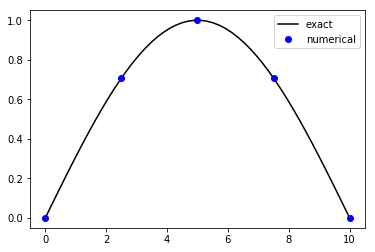

In [5]:
x = np.linspace(0, 10)
y_exact = np.sin(np.pi/10.*x)
y_numerical = v.T[index_lowest]
y_numerical = y_numerical/np.max(y_numerical)
plt.plot(x, y_exact, 'k', [0, 2.5, 5, 7.5, 10], y_numerical, 'bo')
plt.legend(['exact', 'numerical'], loc=0, numpoints=1)
plt.show()

For the other eigenvalues and eigenvectors, the numerical results are less impressive.  For example, the next four eigenvalues are 

In [6]:
for i in range(2, 6) :
    print(np.pi**2 * i**2 / 100)

0.3947841760435743
0.8882643960980423
1.5791367041742972
2.4674011002723395


and the list keeps going because $n$ has no upper limit.  The only way we can capture these *higher modes* is to have more points in our numerical solution.  If the eigenvalues are viewed as frequencies, and the eigenfunctions as waves, it becomes obvious that too few points will prevent us from observing all the oscillations.  However, usually our interest is in $\lambda_1$ and $y_1(x)$, for these correspond (in physical systems) to the *fundamental* or *fundamental mode*.  That could be the critical spatial distribution of neutrons in a reactor, or the natural frequency of a cantileaver beam.  Engineers (of one type of another) must analyze such systems, and numerical eigenvalues often play a role.

## Comment on FDM and Alternatives

The finite-difference method is easy to understand, often simple to implement, and useful for a variety of real-world applications.  However, it isn't the only option and it's often not the best option.  [Finite-volume methods](https://en.wikipedia.org/wiki/Finite_volume_method) (FVM's) integrate the differential equation first, and the resulting $\mathbf{Ax}=\mathbf{b}$ represents a discretetized conservation law.  [Finite-element methods](https://en.wikipedia.org/wiki/Finite_element_method) (FEM's) also integrate the differential equation first (albeit in a slightly different form).  Then, the solutions are assumed to take simple piece-wise continuous form (lines, parabolas, or even cubics), and the integral balance over the whole domain becomes a linear system.  Lots of details, but powerfully successful results. 

These are two examples.  Others include spectral methods, discontinuous-Galerkin methods, and boundary-element methods.  There is a whole world to explore that goes well beyond the present scope (which, of course, is to solve problems).

## Further Reading

Make sure to review the numerical differentiation and linear solver material previously covered.  